<a href="https://colab.research.google.com/github/SomeshRao007/PROACTIVE-AUTOSCALING-FOR-HIGH-WEB-TRAFFIC-ENVIRONMENTS-A-TRANSFORMERS-BASED-APPROACH/blob/main/NASA_July_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from numpy import log


print(os.listdir(r"/content/drive/MyDrive/Colab_Notebooks/"))

['access_log_Jul95.csv', 'access_log_Aug95.csv', 'Somewhat_Homomorphic_Encryption_Toy.ipynb', 'NETPIE2020_Pub_Sub_demo.ipynb', 'nasa-access-log (1).ipynb', 'Untitled0.ipynb', 'nasa-access-log.ipynb', 'NASAD1.csv', 'NASAD5.csv', 'NASA DATASET.ipynb - Colaboratory.pdf', 'NASA_DS_countPri.csv', 'Transformers', 'NASA_DS_count_RF.csv', 'NASA_DS_count_ARIMA.csv', 'NASA_DS_count.csv', 'NASA July ARIMA.ipynb']


In [ ]:
!pip install scikit-learn
!pip install skforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.8/424.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 10.3 MB/s eta 0:00:00


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.0 MB/s eta 0:00:00


In [ ]:
# Data processing
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
#import hvplot.pandas
%matplotlib inline
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 10

# Modelling and forecasting
# ==============================================================================
!pip install scikit-forecast
import skforecast

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.ForecasterSarimax import ForecasterSarimax
from skforecast.model_selection_sarimax import backtesting_sarimax
from skforecast.model_selection_sarimax import grid_search_sarimax

from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from pmdarima import ARIMA

# Warnings config
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

ERROR: Could not find a version that satisfies the requirement scikit-forecast (from versions: none)
ERROR: No matching distribution found for scikit-forecast


In [ ]:
# Libraries
# ======================================================================================
import numpy as np
import pandas as pd
from io import StringIO
import contextlib
import re
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

# pmdarima
from pmdarima import ARIMA
from pmdarima import auto_arima

# statsmodels
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

# skforecast
from skforecast.Sarimax import Sarimax
from skforecast.ForecasterSarimax import ForecasterSarimax
from skforecast.model_selection_sarimax import backtesting_sarimax
from skforecast.model_selection_sarimax import grid_search_sarimax
from sklearn.metrics import mean_absolute_error

import warnings

In [ ]:

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    #nRowsRead = 1000
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    #df= pd.read_csv(r"/content/drive/MyDrive/Colab_Notebooks/access_log_Jul95.csv", delimiter=' ', nrows = nRowsRead,header=None, names=np.arange(8))
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    nGraphRow = int(nGraphRow)
    print(nGraphRow)

    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()





In [ ]:

# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    #print(df)
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()




In [ ]:
#plotCorrelationMatrix(df1, 8)

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns

    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()




In [ ]:
# # @title Default title text
# # nRowsRead = 1000 # specify 'None' if want to read whole file
# # # data.csv has 2965561 rows in reality, but we are only loading/previewing the first 1000 rows
# # df1 = pd.read_csv(r"/content/drive/MyDrive/Colab_Notebooks/access_log_Jul95.csv", delimiter=' ', nrows = nRowsRead,header=None, names=np.arange(8))
# # df1.dataframeName = 'data.csv'
# # nRow, nCol = df1.shape

# # df1.drop(df1.columns[[1, 2,4]], axis=1, inplace=True)
# # print(f'There are {nRow} rows and {nCol} columns')
# # df1.columns =['IP','time stamp', 'Request', 'Response','Duration served']
# # df1['HTTP Method'] = df1['Request'].str.extract(r'^(GET|POST|PUT|DELETE)')
# # df1['Request'] = df1['Request'].str.replace(r'^(GET|POST|PUT|DELETE)\s+', '')
# # df1.head(10)


# # def process_csv_file(file_path, nRowsRead=None):
# #     df1.dataframeName = 'data.csv'
# #     nRow, nCol = df1.shape

# #     df1.drop(df1.columns[[1, 2,4]], axis=1, inplace=True)
# #     print(f'There are {nRow} rows and {nCol} columns')
# #     df1.columns =['IP','time stamp', 'Request', 'Response','Duration served']
# #     df1['HTTP Method'] = df1['Request'].str.extract(r'^(GET|POST|PUT|DELETE)')
# #     df1['Request'] = df1['Request'].str.replace(r'^(GET|POST|PUT|DELETE)\s+', '')

# #     return df1


# # nRowsRead = 1000
# # file_path = "/content/drive/MyDrive/Colab_Notebooks/access_log_Jul95.csv"
# # df = process_csv_file(file_path, nRowsRead)
# # print(df.head(5))


# def process_csv_file(file_path, nRowsRead=None):


#     df = pd.read_csv(file_path, delimiter=' ', nrows=nRowsRead, header=None, names=np.arange(11),encoding_errors='ignore')
#     df.drop(df.columns[[1, 2, 4,8,9,10]], axis=1, inplace=True)
#     # df.drop(df.columns[1] == '[',axis=2,inplace=True )

#     df.columns = ['IP', 'Timestamp', 'Request', 'Response', 'DurationServed']

#     df['HTTP Method'] = df['Request'].str.extract(r'^(GET|POST|PUT|DELETE)')


#     df['Request'] = df['Request'].str.replace(r'^(GET|POST|PUT|DELETE)\s+', '')

#     return df


# nRowsRead = None  # specify 'None' if you want to read the entire file 1048575
# file_path = "/content/drive/MyDrive/Colab_Notebooks/access_log_Jul95.csv"
# df = process_csv_file(file_path, nRowsRead)
# df.dataframeName = 'data.csv'


# df.info()
# df.head(10)

# # df.columns.get_loc('Request')

In [ ]:
# df['Timestamp'] = pd.to_datetime(df['Timestamp'].str.replace('[','').str.replace('?',''), format='%d/%b/%Y:%H:%M:%S')
# df = df.set_index('Timestamp')
# df = df.resample('1T').count()
# df.drop(df.columns[[0,1,3,4]], axis=1, inplace=True)
# df.head(5)
# # df.info()
# df.to_csv("/content/drive/MyDrive/Colab_Notebooks/NASA_DS_count_ARIMA.csv", encoding ='utf-8',index= False)

In [ ]:
# data = df['Response'].values
# print(data.shape)

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

filename = '/content/drive/MyDrive/Colab_Notebooks/NASA_DS_count.csv'  # replace with your actual filename
df = pd.read_csv(filename)

# Check if there are any missing values in 'response'
if df['Response'].isnull().sum() > 0:
    # Handle missing values
    df['Response'].interpolate(method='linear', inplace=True)

start_date = '1995-07-01 00:00:00'
df.index = pd.date_range(start=start_date, periods=len(df), freq='T')


seasonal_period = 1440  # for daily patterns, as there are 1440 minutes in a day


decomposition = seasonal_decompose(df['Response'], period=seasonal_period)


plt.rcParams["figure.figsize"] = (12, 8)
decomposition.plot()
plt.show()


In [ ]:
import pandas as pd
import numpy as np

def process_csv_file(file_path, nRowsRead=None):
    df = pd.read_csv(file_path, delimiter=' ', nrows=nRowsRead, header=None, names=np.arange(11), encoding_errors='ignore')

    df.drop(df.columns[[1, 2, 4, 8, 9, 10]], axis=1, inplace=True)

    df.columns = ['IP', 'Timestamp', 'Request', 'Response', 'DurationServed']


    df['HTTP Method'] = df['Request'].str.extract(r'^(GET|POST|PUT|DELETE)')


    df['Request'] = df['Request'].str.replace(r'^(GET|POST|PUT|DELETE)\s+', '')

    return df

file_path = "/content/drive/MyDrive/Colab_Notebooks/access_log_Jul95.csv"
df = process_csv_file(file_path)
df['Timestamp'] = pd.to_datetime(df['Timestamp'].str.replace('[','').str.replace('?',''), format='%d/%b/%Y:%H:%M:%S')
df = df.set_index('Timestamp')
df = df.resample('1T').count()

# df_resampled = df_resampled[['Response']]

# df_final = df_resampled.reset_index()
df.drop(df.columns[[0,1,3,4]], axis=1, inplace=True)

df = df.reset_index()

# df_final.head(5)
# df.to_csv("/content/drive/MyDrive/Colab_Notebooks/NASA_DS_count.csv", encoding ='utf-8',index= False)

In [ ]:
df.to_csv("/content/drive/MyDrive/Colab_Notebooks/NASA_DS_count_ARIMA.csv", encoding ='utf-8',index= False)

df.head(30)

,Timestamp,Response
0,1995-07-01 00:00:00,42
1,1995-07-01 00:01:00,61
2,1995-07-01 00:02:00,57
3,1995-07-01 00:03:00,71
4,1995-07-01 00:04:00,70
5,1995-07-01 00:05:00,54
6,1995-07-01 00:06:00,52
7,1995-07-01 00:07:00,68
8,1995-07-01 00:08:00,47
9,1995-07-01 00:09:00,46


In [ ]:
df.head(5)

,Response
Timestamp,
1995-07-01 00:00:00,42
1995-07-01 00:01:00,61
1995-07-01 00:02:00,57
1995-07-01 00:03:00,71
1995-07-01 00:04:00,70


In [ ]:
df.tail(5)

,Response
Timestamp,
1995-07-28 13:28:00,64
1995-07-28 13:29:00,91
1995-07-28 13:30:00,75
1995-07-28 13:31:00,92
1995-07-28 13:32:00,42


In [ ]:
# df['Response'] = df['Timestamp'].dt.week

In [ ]:
print(f"Missing values: {df.isnull().any(axis=1).sum()}")

Missing values: 0


In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df.Response.dropna())
print('ADF Statistic: %f' % result[1])
print('p-value: %f' % result[2])





ADF Statistic: 0.000001
p-value: 52.000000


Text(0.5, 1.0, 'Requests vs Time')

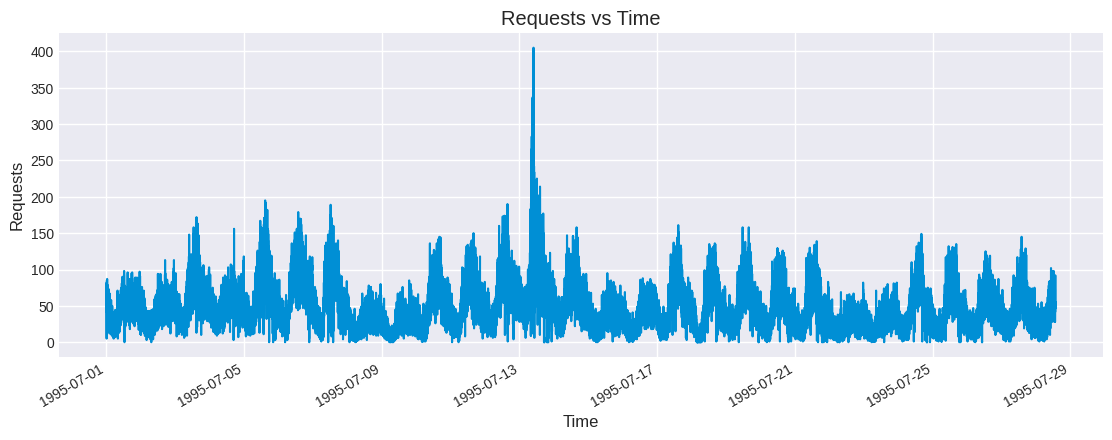

In [ ]:
plt.figure(figsize=(12,4))

# plotPerColumnDistribution(df,5,5)
# plotCorrelationMatrix(df, 8)
# plotScatterMatrix(df, 5, 10)
import matplotlib.pyplot as plt
import datetime
plt.plot(df['Response'])
plt.xticks(rotation=30, ha='right')
plt.xlabel('Time')
plt.ylabel('Requests')
plt.title('Requests vs Time')


# print(df.columns)

In [ ]:

import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
import warnings


df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/NASA_DS_count_ARIMA.csv',  parse_dates=True)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
df.sort_index(inplace=True)


# df = df[df.index.dayofweek < 5]

# last_friday = df[df.index.dayofweek == 4].index.max()


# start_of_last_week = last_friday - pd.Timedelta(days=4)

# # Split the data into train and test
# data_train = df[:start_of_last_week]
# data_test = df[start_of_last_week:last_friday + pd.Timedelta(days=1)]

df_train_val = df[df.index.dayofweek < 5]


end_train = pd.Timestamp('1995-07-21')

# Identify the start and end points for the validation set (July 22nd to July 24th, 1995)
start_validation = pd.Timestamp('1995-07-21')
end_validation = pd.Timestamp('1995-07-24')

# Split the data into train, validation, and test sets
data_train = df_train_val[:end_train]
data_val = df[start_validation:end_validation]
data_test = df[end_validation + pd.Timedelta(days=1):]

print (data_train)
print(data_test)

print(f"Training dates   : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Validation dates : {data_val.index.min()} --- {data_val.index.max()}  (n={len(data_val)})")
print(f"Test dates       : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")
# # SARIMAX Model
# warnings.filterwarnings("ignore", category=UserWarning, message='Non-invertible|Non-stationary')
# model = SARIMAX(data_train.Response, order=(13,1,1), seasonal_order=(1,0,2,14))
# model_res = model.fit(disp=0)
# warnings.filterwarnings("default")

# # Forecast on the training set
# train_pred = model_res.predict(start=0, end=len(data_train)-1)

# # Forecast on the test set
# test_pred = model_res.predict(start=len(data_train), end=len(data_train)+len(data_test)-1)
# val_pred = model_res.predict(start=len(data_train), end=len(data_train)+len(data_val)-1)

# # Calculate and print error metrics for the validation set
# mae_val = mean_absolute_error(data_val.Response, val_pred)
# print(f"Mean Absolute Error on Validation Data: {mae_val}")
# # Calculate and print error metrics
# mae_train = mean_absolute_error(data_train.Response, train_pred)
# print(f"Mean Absolute Error on Train Data: {mae_train}")

# mae_test = mean_absolute_error(data_test.Response, test_pred)
# print(f"Mean Absolute Error on Test Data: {mae_test}")


                     Response
Timestamp                    
1995-07-03 00:00:00        26
1995-07-03 00:01:00        28
1995-07-03 00:02:00        49
1995-07-03 00:03:00        47
1995-07-03 00:04:00        49
...                       ...
1995-07-20 23:56:00        74
1995-07-20 23:57:00        59
1995-07-20 23:58:00        73
1995-07-20 23:59:00        47
1995-07-21 00:00:00        29

[20161 rows x 1 columns]
                     Response
Timestamp                    
1995-07-25 00:00:00        52
1995-07-25 00:01:00        44
1995-07-25 00:02:00        30
1995-07-25 00:03:00        21
1995-07-25 00:04:00        26
...                       ...
1995-07-28 13:28:00        64
1995-07-28 13:29:00        91
1995-07-28 13:30:00        75
1995-07-28 13:31:00        92
1995-07-28 13:32:00        42

[5133 rows x 1 columns]
Training dates   : 1995-07-03 00:00:00 --- 1995-07-21 00:00:00  (n=20161)
Validation dates : 1995-07-21 00:00:00 --- 1995-07-24 00:00:00  (n=4321)
Test dates       : 199

In [ ]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # Assuming 'data_train.Response' and 'data_test.Response' are the actual values
# # and 'train_pred' and 'test_pred' are your predictions from the ARIMA model

# # Convert the actual and predicted values to pandas Series for easy manipulation
# actual_train_series = pd.Series(data_val.Response)
# predicted_train_series = pd.Series(val_pred)
# # actual_test_series = pd.Series(data_test.Response)
# # predicted_test_series = pd.Series(test_pred)

# # Apply a rolling average (also known as moving average)
# rolling_window_size = 50  # Choose a suitable window size
# # smoothed_actual_train = actual_train_series.rolling(window=rolling_window_size).mean()
# # smoothed_predicted_train = predicted_train_series.rolling(window=rolling_window_size).mean()
# # smoothed_actual_test = actual_test_series.rolling(window=rolling_window_size).mean()
# # smoothed_predicted_test = predicted_test_series.rolling(window=rolling_window_size).mean()

# # Plot the smoothed values
# plt.figure(figsize=(15, 7))

# # For training data
# # plt.plot(smoothed_actual_train, color='blue', label='Smoothed Actual Values (Train)')
# # plt.plot(smoothed_predicted_train, color='red', label='Smoothed Predicted Values (Train)')

# # For test data
# # plt.plot(smoothed_actual_test, color='green', label='Smoothed Actual Values (Test)')
# # plt.plot(smoothed_predicted_test, color='orange', label='Smoothed Predicted Values (Test)')

# smoothed_actual_val= actual_train_series.rolling(window=rolling_window_size).mean()
# smoothed_predicted_val = predicted_train_series.rolling(window=rolling_window_size).mean()
# plt.plot(smoothed_predicted_val, color='red', label='Smoothed Predicted Values (val)')
# plt.plot(smoothed_actual_val, color='blue', label='Smoothed Actual Values (Train)')
# # Title and labels
# plt.title('Smoothed Prediction Graph for ARIMA Model')
# plt.xlabel('Time Steps')
# plt.ylabel('Response')

# # Show legend
# plt.legend()

# # Show the plot
# plt.show()


In [ ]:
# import matplotlib.pyplot as plt

# # Plotting the actual and predicted values for the test set
# plt.figure(figsize=(10, 6))
# plt.plot(data_val.index, data_val.Response, label='Actual Test Data', color='blue')
# plt.plot(data_val.index, val_pred, label='Predicted Test Data', color='red')

# # Adding title and labels
# plt.title('Test Set Predictions')
# plt.xlabel('Timestamp')
# plt.ylabel('Response')
# plt.legend()

# # Display the plot
# plt.show()


In [ ]:
# # Plot predictions
# # ==============================================================================
# fig, ax = plt.subplots(figsize=(15, 7))
# # data_train.plot(ax=ax, label='train')
# # data_val.plot(ax=ax, label='val')
# # data_test.plot(ax=ax, label='test')
# # data_val.Response.plot(ax=ax,color = 'green')
# # data_test.Response.plot(ax=ax, color = 'green')
# # plt.plot(predictions_skforecast, color='blue' ,label='Prediction')
# plt.plot(test_pred, color='blue' ,label='Prediction')

# # plt.plot(df['Response'],color = 'green',label='Original')
# # test_pred.plot(ax=ax, color='green',label='Prediction')

# ax.set_title('Predictions with ARIMA model');

In [ ]:
# import pandas as pd

# # Assuming 'df' is your DataFrame and it has a DateTimeIndex
# # Create a column to identify weekdays
# df['DayOfWeek'] = df.index.dayofweek

# # Define the date ranges for training (only weekdays)
# train_ranges = [
#     ('1995-07-03', '1995-07-07'),
#     ('1995-07-10', '1995-07-14'),
#     ('1995-07-17', '1995-07-21')
# ]

# # Concatenate the training data for the given date ranges (weekdays only)
# data_train = pd.concat([df.loc[start:end].query('DayOfWeek < 5') for start, end in train_ranges])

# # Validation data will be the week after the last training range
# start_validation = '1995-07-24'
# end_validation = '1995-07-28'

# # Test data will be the 4th week of the month, adjust the dates accordingly
# start_test = '1995-07-24'
# end_test = '1995-07-28'

# # Create validation and test datasets (weekdays only)
# data_val = df.loc[start_validation:end_validation].query('DayOfWeek < 5')
# data_test = df.loc[start_test:end_test].query('DayOfWeek < 5')

# # Now print the results
# print(data_test)
# print(f"Training dates   : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
# print(f"Validation dates : {data_val.index.min()} --- {data_val.index.max()}  (n={len(data_val)})")
# print(f"Test dates       : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")


NameError: ignored

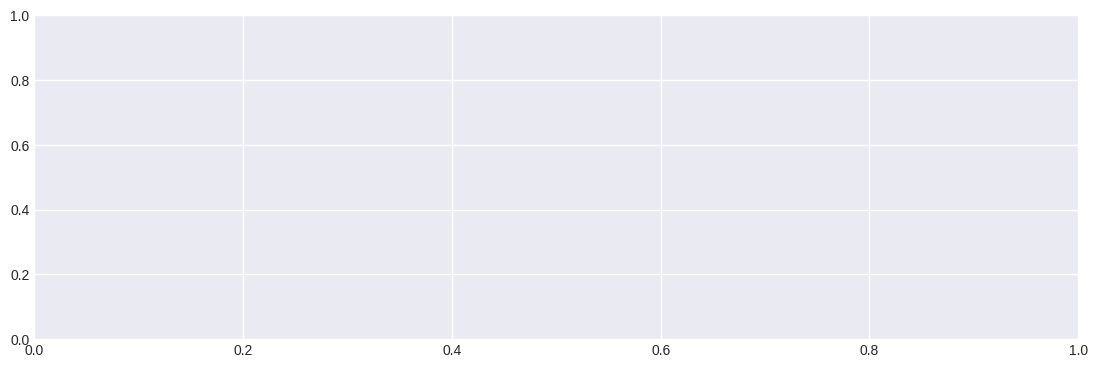

In [ ]:
# # Static plot time series
# # ==============================================================================
# fig, ax = plt.subplots(figsize=(12, 4))
# data_train.Response.plot(ax=ax, label='train', linewidth=1)
# data_val.Response.plot(ax=ax, label='val', linewidth=1)
# data_test.Response.plot(ax=ax, label='test', linewidth=1)
# ax.set_title('NASA Access Log95 time series graph')
# ax.legend();



In [ ]:
# Static plot Seasonality
# # # ==============================================================================
# fig, ax = plt.subplots(figsize=(7, 3.5))
# df.index
# # df['Timestamp'] =df.index('Timestamp')
# df.boxplot(column='Response', by='Timestamp', ax=ax,)
# df.groupby('Timestamp')['Response'].median().plot(style='o-', linewidth=0.8, ax=ax)
# ax.set_ylabel('Response')
# ax.set_title('Monthly visitors')
# fig.suptitle('');


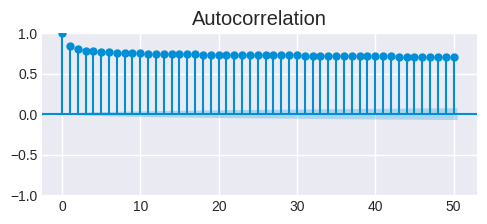

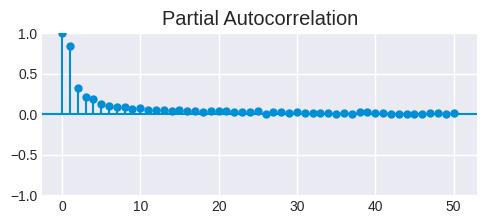

In [ ]:
# Autocorrelation plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(5, 2))
plot_acf(df.Response, ax=ax, lags=50)
plt.show()

# Partial autocorrelation plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(5, 2))
plot_pacf(df.Response, ax=ax, lags=50)
plt.show()

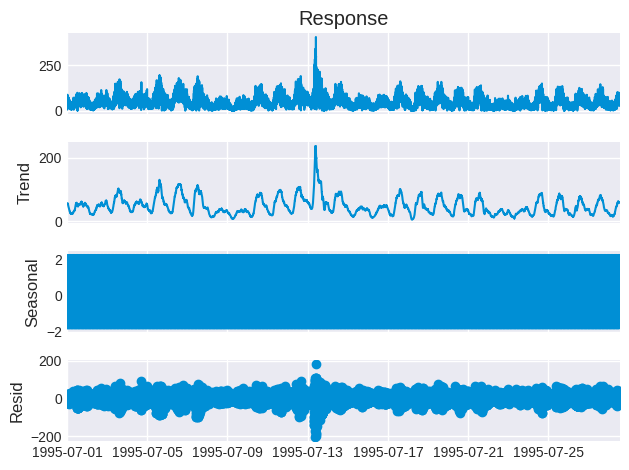

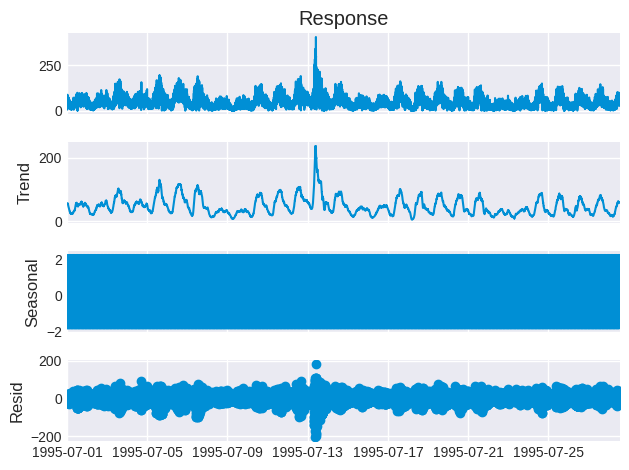

In [ ]:
# Decompose the time series
result = seasonal_decompose(df['Response'], model='additive', period=100) #10080)

# Plot the decomposed components
result.plot()


In [ ]:

# range_index = pd.RangeIndex(start=0, stop=10)

# datetime_index = pd.to_datetime(range_index)

# print(type(datetime_index))

# end_validation = pd.date_range(start= '1995-07-01', end= '1995-07-29')
# print (type (end_validation))
# df.index = pd.to_datetime(df.index)
# df.index = pd.date_range(end_validation, periods=len(df))

In [ ]:
# !pip install statsmodels --upgrade

In [ ]:
# from statsmodels.tsa.arima_model import ARIMA

# # 1,1,2 ARIMA Model
# model = ARIMA(df.Response, order=(1,1,2))
# model_fit = model.fit(disp=0)
# print(model_fit.summary())

In [ ]:
# import pandas as pd
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from sklearn.metrics import mean_absolute_error

# # Assumptions: df is preprocessed, no NaNs, and has a numeric index

# window_size = 30  # 30 minutes
# step_size = 1  # Move the window by 1 minute at each iteration

# actual_values = []
# predictions = []

# for start in range(0, len(df) - window_size, step_size):
#     end = start + window_size
#     data_train = df.iloc[start:end]

#     try:
#         model = SARIMAX(data_train['Response'], order=(4,0,0), seasonal_order=(1,0,2,14))
#         model_res = model.fit(disp=0)

#         # Forecast the next point
#         forecast = model_res.forecast(steps=1)
#         predictions.append(forecast.iloc[0])
#         actual_values.append(df.iloc[end]['Response'])
#     except (ValueError, np.linalg.LinAlgError):
#         continue  # Skip the window where the model fails to fit

# # Compute Mean Absolute Error if predictions were made
# if predictions:
#     mae = mean_absolute_error(actual_values, predictions)
#     print(f"Mean Absolute Error: {mae}")

#     results_df = pd.DataFrame({'Actual': actual_values, 'Predicted': predictions})
#     print(results_df.head())
# else:
#     print("No predictions were made due to model fitting issues.")


KeyboardInterrupt: ignored

In [ ]:
# Split data: train-validation-test
# ==============================================================================
end_train = '1995-07-1'
end_validation = '1995-07-23'


data_train = df.loc[: end_train, :]
data_val   = df.loc[end_train:end_validation, :]
data_test  = df.loc[end_validation:, :]
print (data_test)
print(f"Training dates   : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Validation dates : {data_val.index.min()} --- {data_val.index.max()}  (n={len(data_val)})")
print(f"Test dates       : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

# print(f"train full  dates       :(n={len(data_trainFull)})")

                     Response
Timestamp                    
1995-07-23 00:00:00        45
1995-07-23 00:01:00        47
1995-07-23 00:02:00        19
1995-07-23 00:03:00        54
1995-07-23 00:04:00        57
...                       ...
1995-07-28 13:28:00        64
1995-07-28 13:29:00        91
1995-07-28 13:30:00        75
1995-07-28 13:31:00        92
1995-07-28 13:32:00        42

[8013 rows x 1 columns]
Training dates   : 1995-07-01 00:00:00 --- 1995-07-01 23:59:00  (n=1440)
Validation dates : 1995-07-01 00:00:00 --- 1995-07-23 23:59:00  (n=33120)
Test dates       : 1995-07-23 00:00:00 --- 1995-07-28 13:32:00  (n=8013)


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
import warnings

# Setting up the SARIMAX model
warnings.filterwarnings("ignore", category=UserWarning, message='Non-invertible|Non-stationary')

model = SARIMAX(data_train.Response, order=(4,0,0), seasonal_order=(1,0,2,14))
model_res = model.fit(disp=0)
warnings.filterwarnings("default")

# Model summary
model_summary = model_res.summary()





/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)


In [ ]:
# Forecasting on the training set
train_pred = model_res.predict(start=0, end=len(data_train)-1)

# Forecasting on the test set
test_pred = model_res.predict(start=len(data_train), end=len(data_train)+len(data_test)-1)

# Calculating and printing error metrics
mae_train = mean_absolute_error(data_train.Response, train_pred)
mae_test = mean_absolute_error(data_test.Response, test_pred)

mae_train, mae_test

(10.267669005970191, 22.886989669632964)

In [ ]:
print(test_pred)

In [ ]:
import matplotlib.pyplot as plt

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot training data
ax[0].plot(data_test.Response, label='Actual Training Data')
ax[0].plot(train_pred, label='Predicted Training Data', alpha=0.7)
ax[0].set_title('Training Data: Actual vs Predicted')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Response')
ax[0].legend()

# Plot test data
ax[1].plot(data_test.Response, label='Actual Test Data')
ax[1].plot(test_pred, label='Predicted Test Data', alpha=0.7)
ax[1].set_title('Test Data: Actual vs Predicted')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Response')
ax[1].legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data_train' and 'train_pred' are already defined and are Pandas Series with a DateTimeIndex

# Plotting the data up to July 29
end_date = '1995-07-29'
plt.figure(figsize=(10, 5))

# Plot actual training data
plt.plot(data_test.loc[:end_date].index, data_test.loc[:end_date], label='Actual Test Data')

# Plot predicted training data
plt.plot(test_pred.loc[:end_date].index, test_pred.loc[:end_date], label='Predicted Test Data', alpha=0.7)

# Add titles and labels
plt.title('Test Data: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Response')

# Show legend
plt.legend()

# Display the plot
plt.show()


In [ ]:
# predictions_skforecast.to_csv("/content/drive/MyDrive/Colab_Notebooks/NASA_DS_countPri.csv", encoding ='utf-8',index= False)

In [ ]:
# mse = calculate_mse(data_test, predictions_skforecast)
# rmse = calculate_rmse(data_test, predictions_skforecast)
# mae = calculate_mae(data_test, predictions_skforecast)

In [ ]:
# # rolling forecasts
# for i in range(1, len(y)):
#     # predict
#     model = ARIMA(history, order=(2,0,1))
#     model_fit = model.fit()
#     yhat = model_fit.forecast()[0]
#     print(yhat)
#     # invert transformed prediction
#     w=predictions.append(yhat)
#     print(w)
#     # observation
#     obs = y[i]
#     history.append(obs)

In [ ]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# import numpy as np

# # Assuming 'predictions' is your list of predicted values
# # and 'y' is the actual values

# mse = mean_squared_error(y, predictions)
# rmse = np.sqrt(mse)
# mae = mean_absolute_error(y, predictions)
# mape = np.mean(np.abs((y - predictions) / y)) * 100

# print(f"Mean Absolute Error (MAE): {mae}")
# print(f"Mean Squared Error (MSE): {mse}")
# print(f"Root Mean Squared Error (RMSE): {rmse}")
# print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


In [ ]:
# # report performance
# mse = mean_squared_error(y, predictions)
# print('MSE: '+str(mse))
# mae = mean_absolute_error(y, predictions)
# print('MAE: '+str(mae))
# rmse = math.sqrt(mean_squared_error(y, predictions))
# print('RMSE: '+str(rmse))

In [ ]:
# @title Default title text
from statsmodels.tsa.stattools import adfuller

print("Results of Dicky-Fuller Test:")
dftest = adfuller(df.Response, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['ADF Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

Results of Dicky-Fuller Test:
ADF Statistic                 -5.724651e+00
p-value                        6.815349e-07
#Lags Used                     5.200000e+01
Number of Observations Used    3.964000e+04
Critical Value (1%)           -3.430515e+00
Critical Value (5%)           -2.861613e+00
Critical Value (10%)          -2.566809e+00
dtype: float64


Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=388728.393, Time=1.08 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=339748.511, Time=2.97 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=365449.935, Time=13.28 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=434467.248, Time=0.47 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=335328.840, Time=1.71 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=333563.449, Time=2.15 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=332201.160, Time=5.83 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=329265.817, Time=72.73 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=329282.134, Time=59.80 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=329284.675, Time=62.68 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=329321.132, Time=76.41 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=329292.791, Time=14.37 sec

Best model:  ARIMA(4,0,1)(0,0,0)[0] intercept
Total fit time: 313.493 seconds
329265.8169121172


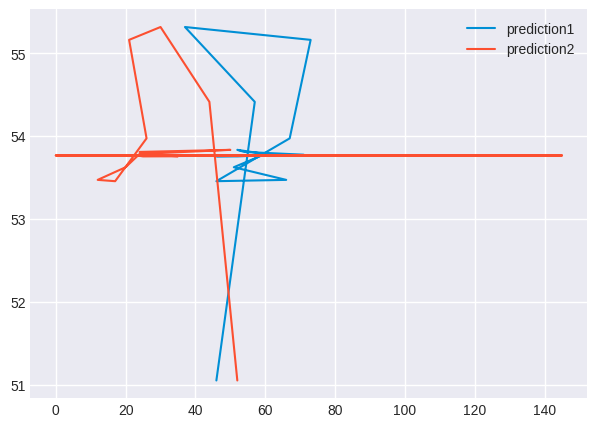

In [ ]:
# from pmdarima.arima import auto_arima

# model = auto_arima(df.Response, start_p=0, start_q=0,
#                            max_p=4, max_q=4,start_P=1, D=None,  start_Q=1, m=1,
#                            seasonal=True,
#                            d=0, trace= 1,
#                            parallel = True,
#                            error_action='ignore',
#                            suppress_warnings=True,
#                            stepwise=True)
# print(model.aic())

# model.fit(data_train)

# prediction1 = model.predict(n_periods=len(data_train))
# prediction2 = model.predict(n_periods=len(data_test))

# #plot the predictions for validation set
# # plt.plot(time_train,train, label='train')
# # plt.plot(time_test,test, label='test')
# plt.plot(data_train, prediction1, label='prediction1')
# plt.plot(data_test, prediction2, label='prediction2')
# plt.legend()
# plt.show()

In [ ]:
# ARIMA model with skforecast.Sarimax
# ==============================================================================
warnings.filterwarnings("ignore", category=UserWarning, message='Non-invertible|Non-stationary')

model = SARIMAX(data_train.Response, order=(6,0,1), seasonal_order=(1,0,2,14))

model_res = model.fit(disp=0)
warnings.filterwarnings("default")

# model_res.num_parameters()
model_res.summary()
# sum(p.numel() for p in model.parameters())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                Response   No. Observations:                27360
Model:             SARIMAX(6, 0, 1)x(1, 0, [1, 2], 14)   Log Likelihood             -114588.088
Date:                                 Mon, 27 Nov 2023   AIC                         229198.176
Time:                                         14:31:57   BIC                         229288.561
Sample:                                     07-01-1995   HQIC                        229227.305
                                          - 07-19-1995                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3182      0.004    331.173      0.000       1.310       1.326
ar.L2         -0.2563      0.006    -39.462      0.000      -0.269      -0.244
ar.L3         -0.0532      0.006     -8.494      0.000      -0.066      -0.041
ar.L4          0.0362      0.007      5.356      0.000       0.023       0.050
ar.L5         -0.0330      0.007     -4.885      0.000      -0.046      -0.020
ar.L6         -0.0121      0.004     -2.731      0.006      -0.021      -0.003
ma.L1         -0.9379      0.002   -449.379      0.000      -0.942      -0.934
ar.S.L14       0.9983      0.002    516.058      0.000       0.994       1.002
ma.S.L14      -1.0153      0.005   -201.846      0.000      -1.025      -1.005
ma.S.L28       0.0162      0.005      3.559      0.000       0.007       0.025
sigma2       257.4503      1.094    235.334      0.000     255.306     259.594
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):             52532.14
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.10
Prob(H) (two-sided):                  0.26   Kurtosis:                         9.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Forecast on the training set
train_pred = model_res.predict(start=0, end=len(data_train)-1)

# Forecast on the test set
test_pred = model_res.predict(start=len(data_train), end=len(data_train)+len(data_test)-1)
# print(data_train.shape)
# print(train_pred.shape)
# Calculate and print error metrics
mae_train = mean_absolute_error(data_train, train_pred)
print(f"Mean Absolute Error on train Data: {mae_train}")

mae_test = mean_absolute_error(data_test, test_pred)
print(f"Mean Absolute Error on Test Data: {mae_test}")

Mean Absolute Error on train Data: 31.948656511368203
Mean Absolute Error on Test Data: 33.66631560407911


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Assuming 'predictions' is your list of predicted values
# and 'y' is the actual values

mse = mean_squared_error(data_train, train_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(data_test, test_pred)
mape = np.mean(np.abs((data_test - test_pred) / data_test)) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Mean Absolute Error (MAE): 42.12176930746095
Mean Squared Error (MSE): 254.2937827685785
Root Mean Squared Error (RMSE): 15.94659157213787
Mean Absolute Percentage Error (MAPE): 1995-07-20 00:00:00   NaN
1995-07-20 00:01:00   NaN
1995-07-20 00:02:00   NaN
1995-07-20 00:03:00   NaN
1995-07-20 00:04:00   NaN
                       ..
1995-07-25 13:29:00   NaN
1995-07-25 13:30:00   NaN
1995-07-25 13:31:00   NaN
1995-07-25 13:32:00   NaN
Response              NaN
Length: 8014, dtype: float64%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Prediction
# ==============================================================================
predictions_skforecast = model_res.predict(steps=len(data_test))
predictions_skforecast.columns = ['skforecast']
display(predictions_skforecast.tail(4))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


1995-07-01 23:56:00    24.796166
1995-07-01 23:57:00    27.870776
1995-07-01 23:58:00    30.519749
1995-07-01 23:59:00    26.424971
Freq: T, Name: predicted_mean, dtype: float64

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:792: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = leg.legendHandles


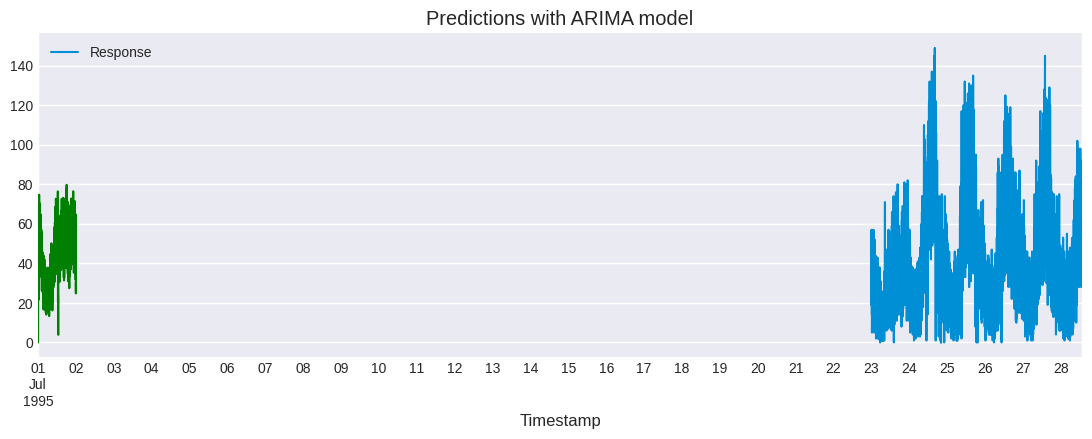

In [ ]:
# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(12, 4))
# data_train.plot(ax=ax, label='train')
# data_val.plot(ax=ax, label='val')
data_test.plot(ax=ax, label='test')
# data_val.Response.plot(ax=ax,color = 'green')
# data_test.Response.plot(ax=ax, color = 'green')
# plt.plot(predictions_skforecast, color='blue' ,label='Prediction')


# plt.plot(df['Response'],color = 'green',label='Original')
predictions_skforecast.plot(ax=ax, color='green',label='Prediction')

ax.set_title('Predictions with ARIMA model');

Training dates   : 1995-07-01 00:00:00 --- 1995-07-19 23:59:00  (n=27360)
Validation dates : 1995-07-19 00:00:00 --- 1995-07-23 23:59:00  (n=7200)
Test dates       : 1995-07-23 00:00:00 --- 1995-07-28 13:32:00  (n=8013)


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferr

Optimal Window Size: 842


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)


Optimal Validation MSE: 19.2083644093326


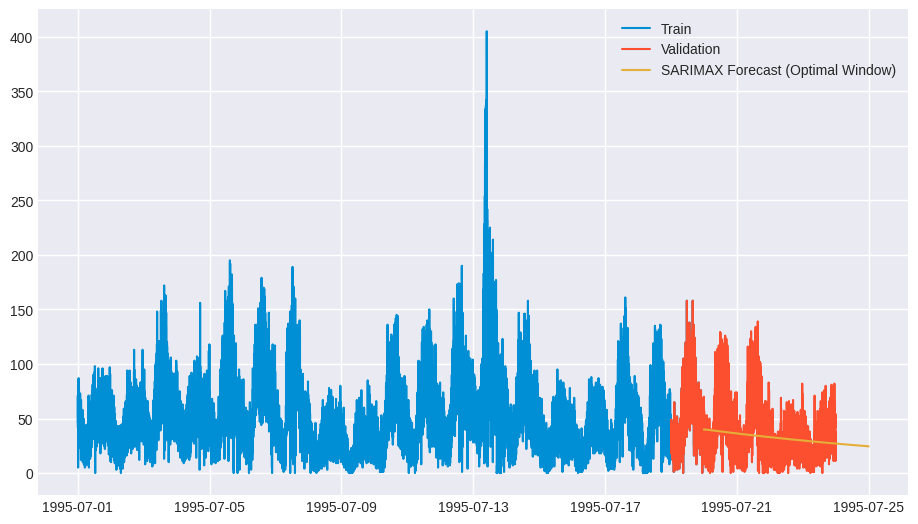

Test MSE: 21.03493204748489


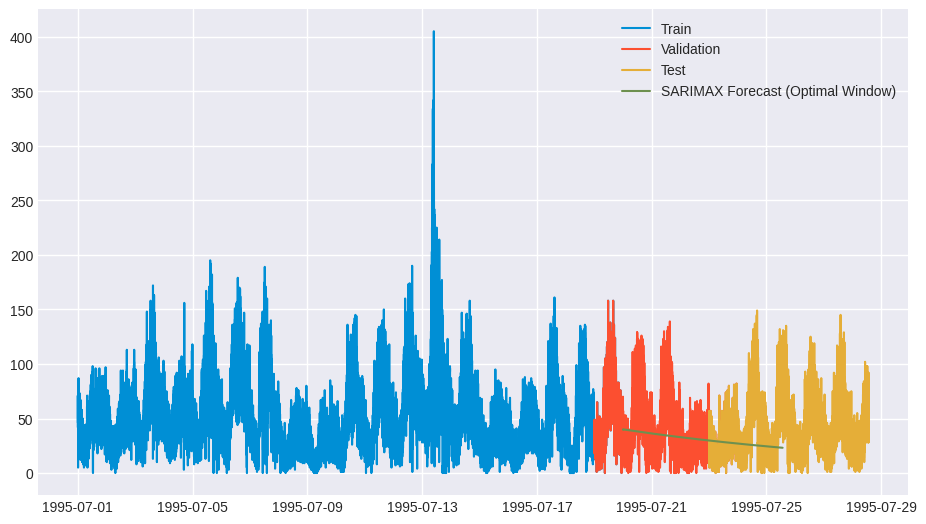

In [ ]:
#variable window

import pandas as pd
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Set the initial size of the training window
initial_window_size = 2  # You can adjust this value

# Split data: train-validation-test
# ==============================================================================
end_train = '1995-07-19'
end_validation = '1995-07-23'

data_train = df.loc[: end_train, 'Response']
data_val   = df.loc[end_train:end_validation, 'Response']
data_test  = df.loc[end_validation:, 'Response']

print(f"Training dates   : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Validation dates : {data_val.index.min()} --- {data_val.index.max()}  (n={len(data_val)})")
print(f"Test dates       : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

# Fit SARIMAX model on training data
# ==============================================================================
warnings.filterwarnings("ignore", category=UserWarning, message='Non-invertible|Non-stationary')

# Fit the model
# Note: Adjust the order and seasonal_order parameters as needed based on your model selection process
model = SARIMAX(data_train, order=(2, 0, 1), seasonal_order=(0, 0, 0, 4))
model_res = model.fit(disp=0)

warnings.filterwarnings("default")

# Print model summary
model_res.summary()

# Variable Window Validation
# ==============================================================================
window_sizes = range(initial_window_size, len(data_train) - len(data_val) + 1)

mae_vals = []  # To store MAE for each window size

for window_size in window_sizes:
    # Expand the training set
    train_subset = data_train.iloc[-window_size:]

    # Fit the model on the expanded training set
    model_res_subset = SARIMAX(train_subset, order=(2, 0, 1), seasonal_order=(0, 0, 0, 4)).fit(disp=0)

    # Out-of-sample forecast on the validation set
    forecast = model_res_subset.get_forecast(steps=len(data_val))
    forecast_val = forecast.predicted_mean

    # Calculate MAE on the validation set
    mae_val = mean_absolute_error(data_val, forecast_val)
    mae_vals.append(mae_val)

# Find the optimal window size (minimum MAE)
optimal_window_size = window_sizes[mae_vals.index(min(mae_vals))]
print(f'Optimal Window Size: {optimal_window_size}')

# Re-fit the model on the optimal window size
optimal_model = SARIMAX(data_train.iloc[-optimal_window_size:], order=(2, 0, 1), seasonal_order=(0, 0, 0, 4)).fit(disp=0)

# Out-of-sample forecast on the validation set using the optimal model
forecast_optimal = optimal_model.get_forecast(steps=len(data_val))
forecast_val_optimal = forecast_optimal.predicted_mean

# Calculate MAE on the validation set using the optimal model
mae_val_optimal = mean_absolute_error(data_val, forecast_val_optimal)
print(f'Optimal Validation MSE: {mae_val_optimal}')

# Plot the results
# ==============================================================================
plt.figure(figsize=(10, 6))
plt.plot(data_train, label='Train')
plt.plot(data_val, label='Validation')
plt.plot(forecast_val_optimal.index, forecast_val_optimal, label='SARIMAX Forecast (Optimal Window)')
plt.legend()
plt.show()

# Test the model on the test set
# ==============================================================================
# It's important not to re-fit the model; use the existing fit to forecast
forecast_test = optimal_model.get_forecast(steps=len(data_test))
forecast_test = forecast_test.predicted_mean

# Calculate MAE on the test set
mae_test = mean_absolute_error(data_test, forecast_test)
print(f'Test MSE: {mae_test}')

# Plot the results
# ==============================================================================
plt.figure(figsize=(10, 6))
plt.plot(data_train, label='Train')
plt.plot(data_val, label='Validation')
plt.plot(data_test, label='Test')
plt.plot(forecast_test.index, forecast_test, label='SARIMAX Forecast (Optimal Window)')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency T will be used.
  self._init_dates(dates, freq)


Training dates   : 1995-07-01 00:00:00 --- 1995-07-19 23:59:00  (n=27360)
Validation dates : 1995-07-19 00:00:00 --- 1995-07-23 23:59:00  (n=7200)
Test dates       : 1995-07-23 00:00:00 --- 1995-07-28 13:32:00  (n=8013)
Validation MSE: 31.50308632631116


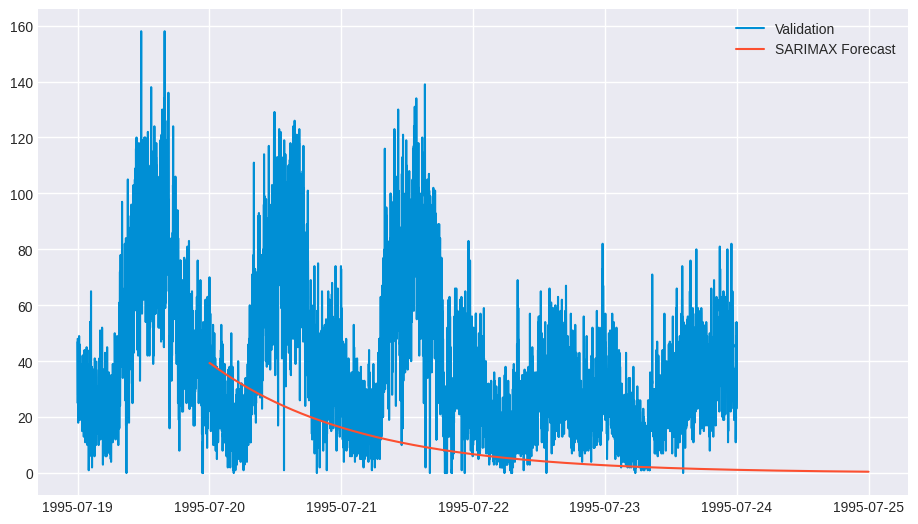

Test MSE: 34.002054636142944


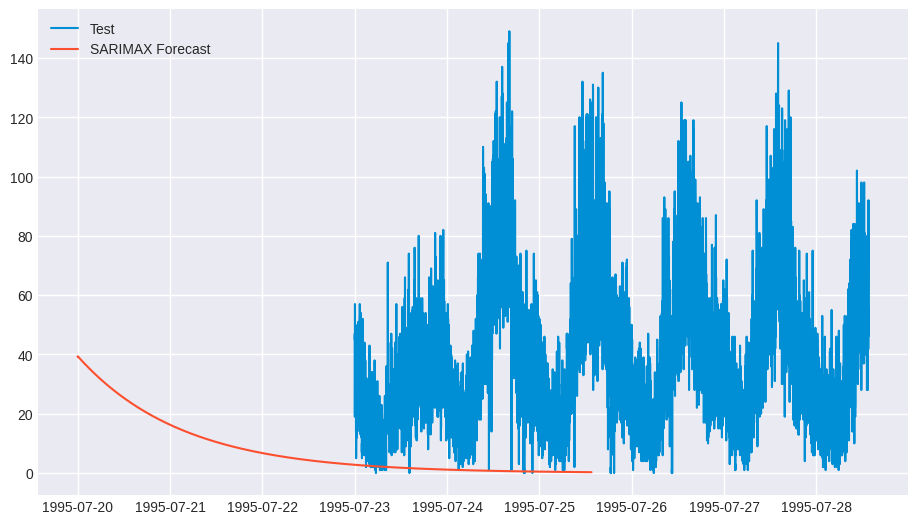

In [ ]:

# static window

import pandas as pd
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Split data: train-validation-test
# ==============================================================================
end_train = '1995-07-19'
end_validation = '1995-07-23'

data_train = df.loc[: end_train, 'Response']
data_val   = df.loc[end_train:end_validation, 'Response']
data_test  = df.loc[end_validation:, 'Response']

print(f"Training dates   : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Validation dates : {data_val.index.min()} --- {data_val.index.max()}  (n={len(data_val)})")
print(f"Test dates       : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

# Fit SARIMAX model on training data
# ==============================================================================
warnings.filterwarnings("ignore", category=UserWarning, message='Non-invertible|Non-stationary')

# Fit the model
# Note: Adjust the order and seasonal_order parameters as needed based on your model selection process
model = SARIMAX(data_train, order=(2, 0, 1), seasonal_order=(0, 0, 0, 4))
model_res = model.fit(disp=0)

warnings.filterwarnings("default")

# Print model summary
model_res.summary()

# Validate the model on the validation set
# ==============================================================================
# Out-of-sample forecast
forecast = model_res.get_forecast(steps=len(data_val))
forecast_val = forecast.predicted_mean
# In-sample forecast
predictions_train = model_res.predict(start=data_train.index[0], end=data_train.index[-1])

# Calculate MSE on the validation set
mae_val = mean_absolute_error(data_val, forecast_val)
print(f'Validation MSE: {mae_val}')

# Plot the results
# ==============================================================================
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# plt.plot(data_train, label='Train')
plt.plot(data_val, label='Validation')
# plt.plot(data_test, label='Test')
plt.plot(forecast_val.index, forecast_val, label='SARIMAX Forecast')
plt.legend()
plt.show()

# Test the model on the test set
# ==============================================================================
# It's important not to re-fit the model; use the existing fit to forecast
forecast_test = model_res.get_forecast(steps=len(data_test))
forecast_test = forecast_test.predicted_mean

# Calculate MSE on the test set
mae_test = mean_absolute_error(data_test, forecast_test)
print(f'Test MSE: {mae_test}')

# Plot the results
# ==============================================================================
plt.figure(figsize=(10, 6))
# plt.plot(data_train, label='Train')
# plt.plot(data_val, label='Validation')
plt.plot(data_test, label='Test')
plt.plot(forecast_test.index, forecast_test, label='SARIMAX Forecast')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


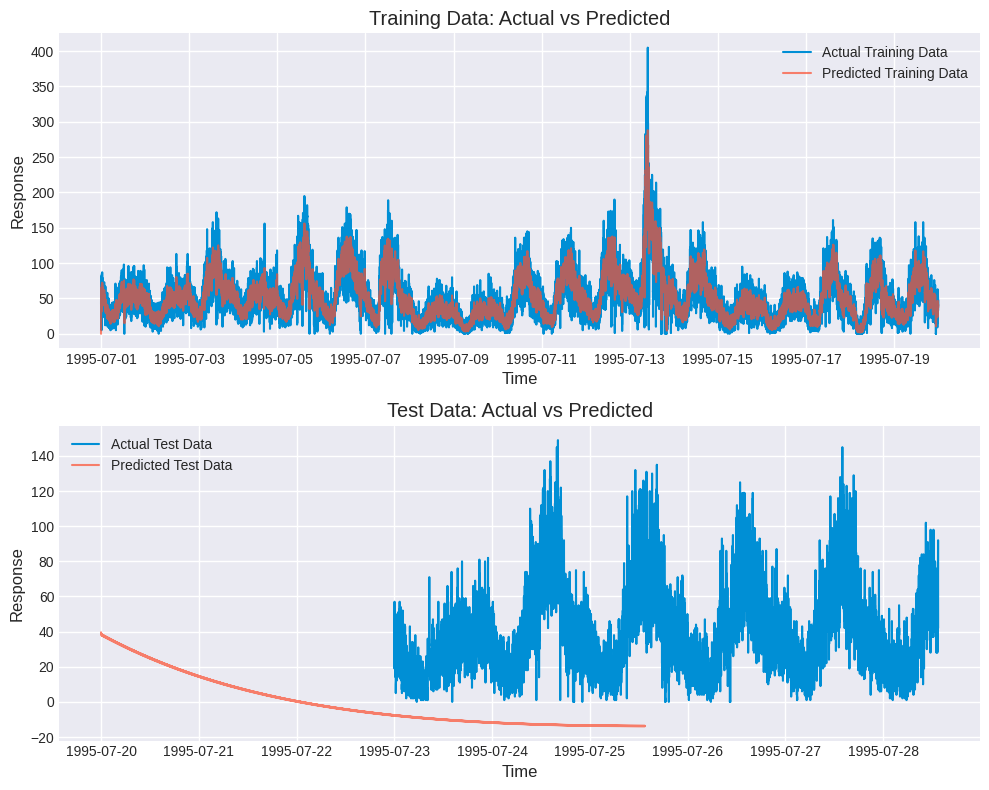

In [ ]:
import matplotlib.pyplot as plt

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# Plot training data
ax[0].plot(data_train.Response, label='Actual Training Data')
ax[0].plot(train_pred, label='Predicted Training Data', alpha=0.7)
ax[0].set_title('Training Data: Actual vs Predicted')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Response')
ax[0].legend()

# Plot test data
ax[1].plot(data_test.Response, label='Actual Test Data')
ax[1].plot(test_pred, label='Predicted Test Data', alpha=0.7)
ax[1].set_title('Test Data: Actual vs Predicted')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Response')
ax[1].legend()

# Show the plot
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:792: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = leg.legendHandles


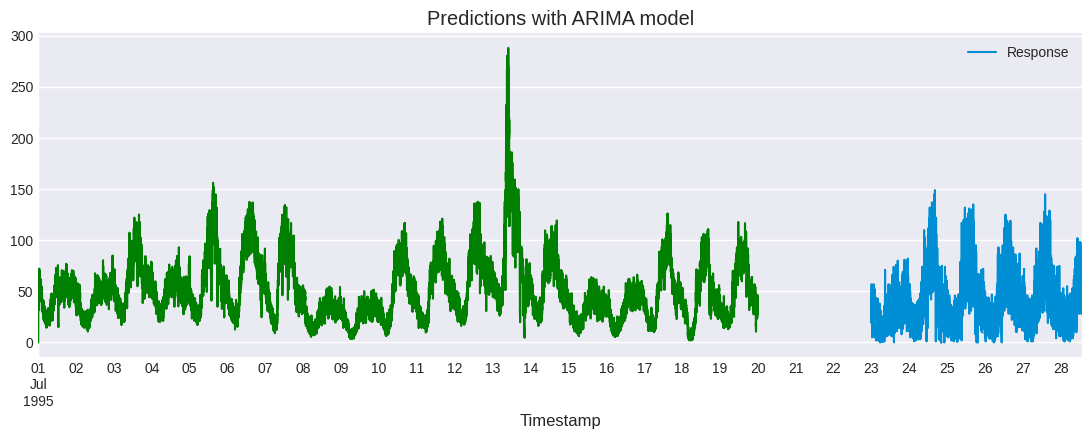

In [ ]:
# Plot predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(12, 4))
# data_train.plot(ax=ax, label='train')
# data_val.plot(ax=ax, label='val')
data_test.plot(ax=ax, label='test')
# data_val.Response.plot(ax=ax,color = 'green')
# data_test.Response.plot(ax=ax, color = 'green')
# plt.plot(predictions_skforecast, color='blue' ,label='Prediction')


# plt.plot(df['Response'],color = 'green',label='Original')
predictions_skforecast.plot(ax=ax, color='green',label='Prediction')

ax.set_title('Predictions with ARIMA model');

In [ ]:
# # Backtest forecaster
# # ==============================================================================
# forecaster = ForecasterSarimax(
#                  regressor=Sarimax(
#                                 order=(1, 1, 1),
#                                 seasonal_order=(1, 1, 1, 12),
#                                 maxiter=200
#                             )
#              )


# metric, predictions = backtesting_sarimax(
#                           forecaster            = forecaster,
#                           y                     = df.loc[:end_validation],
#                           initial_train_size    = len(data_train),
#                           fixed_train_size      = False,
#                           steps                 = 12,
#                           metric                = 'mean_absolute_error',
#                           refit                 = True,
#                           n_jobs                = "auto",
#                           suppress_warnings_fit = True,
#                           verbose               = True,
#                           show_progress         = True
#                       )

# print(f"Metric (mean_absolute_error): {metric}")
# display(predictions.head(4))

In [ ]:
df.head(5)

In [ ]:
df.tail()

In [ ]:
min_value = df["Response"].min()
max_value = df["Response"].max()

print(f"Minimum Response Value: {min_value}")
print(f"Maximum Response Value: {max_value}")

In [ ]:
df.index = pd.date_range(end_validation, periods=len(df))
# ForecasterSarimax               This one
# ==============================================================================
forecaster_sarimax = ForecasterSarimax(
                         regressor     = ARIMA(order=(1, 1, 1), maxiter=50),
                         fit_kwargs    = {'disp': 0},
                         forecaster_id = 'web_traffic_sarimax'
                     )

# Backtest ARIMA
# ==============================================================================
metric, predictions = backtesting_sarimax(
                          forecaster         = forecaster_sarimax,
                          y                  = df.Response,
                          initial_train_size = len(data_test),
                          steps              = 7,
                          metric             = 'mean_absolute_error',
                          refit              = False,
                          fixed_train_size   = False,
                          verbose            = False,
                          show_progress      = True
                      )

print(f'Backtest error: {metric}')
predictions.head(5)

In [ ]:
# Plot backtest predictions
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 3))
data_test.plot(ax=ax, label='test')
predictions.plot(ax=ax)
ax.set_title('Backtest predictions with SARIMAX model')
ax.legend();

In [ ]:
# Grid search of hyperparameters
# ==============================================================================

df.index = pd.date_range(end_validation, periods=len(df))

param_grid = {'order': [ (1, 2, 0)]}

results = grid_search_sarimax(
              forecaster         = forecaster_sarimax,
              y                  = df.Response,
              param_grid         = param_grid,
              initial_train_size =  len(data_test),
              steps              = 7,
              metric             = 'mean_absolute_error',
              refit              = False,
              fixed_train_size   = False,
              return_best        = True,
              verbose            = False
          )

results

# New Section